# [실습4] 금속분말 생성공정 최적화를 위한 비선형회귀 기법


---

## 실습 목표
---
- 다항회귀 분석을 수행해봅니다.
- MLP 모델을 구현해봅니다.
- 다양한 학습률을 비교해봅니다.
- 다양한 최적화 함수를 비교해봅니다.
- 금속분말 데이터를 MLP 모델에 적용해봅니다.

## 실습 목차
---
1. **다항 회귀 분석 수행:** 다항 회귀 분석 모델을 학습, 예측, 평가해봅니다.

2. **MLP 모델의 구현:** Keras 를 이용한 MLP 구현

3. **회귀 모델 수행:** 금속분말 데이터셋을 이용하여 회귀모델 학습

## 실습 개요
---

이번 실습에서는 다항 회귀 분석을 수행해보고, 비선형 데이터를 다룰 수 있는 MLP 모델에 대해 배워봅니다.

## 1. 다항회귀 분석 수행
---
다항 회귀 분석 모델을 구현해보고, 성능을 비교해봅니다.


### 1.1 라이브러리 불러오기

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from tensorflow.keras.layers import Dense, Input

### 1.2 데이터 생성

In [2]:
# 마땅한 데이터셋이 없어서 임의로 생성
np.random.seed(0)
X = np.random.normal(size = (1000, 1)) 
y = X ** 3 * 3 + X ** 2 * 2 + X - 2 + np.random.normal(size = (1000, 1)) * 3

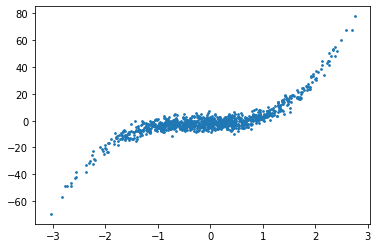

In [3]:
plt.scatter(X, y, s = 3)
plt.show()

### 1.3 데이터 분할

In [4]:
train_ratio = 0.8
train_X = X[:int(len(X) * train_ratio)].reshape(-1, 1)
train_y = y[:int(len(X) * train_ratio)].reshape(-1, 1)
test_X = X[int(len(X) * train_ratio):].reshape(-1, 1)
test_y = y[int(len(X) * train_ratio):].reshape(-1, 1)

### 1.4 선형 회귀 모델

### 1.4.1 최소제곱 선형 회귀 모델 학습

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
fitter = LinearRegression()
fitter

LinearRegression()

In [7]:
fitter.fit(train_X, train_y)

LinearRegression()

### 1.4.2 최소제곱 선형 회귀 모델 예측

In [8]:
pred = fitter.predict(test_X)

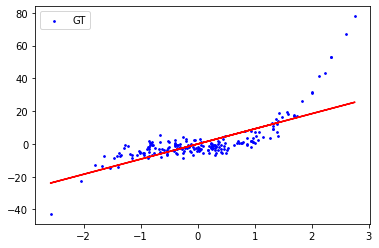

In [9]:
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.plot(test_X, pred, c = 'red')
plt.legend()
plt.show()

### 1.4.3 최소제곱 선형 회귀 모델 평가

In [10]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.584614


### 1.5 다항 회귀 모델

### 1.5.1 데이터 전처리

In [11]:
train_Xs = np.concatenate([train_X ** 3, train_X ** 2, train_X], axis=1)
test_Xs = np.concatenate([test_X ** 3, test_X ** 2, test_X], axis=1)

### 1.5.2 최소제곱 선형 회귀 모델 학습

In [12]:
fitter = LinearRegression()
fitter

LinearRegression()

In [13]:
fitter.fit(train_Xs, train_y)

LinearRegression()

### 1.5.3 최소제곱 선형 회귀 모델 예측

In [14]:
pred = fitter.predict(test_Xs)

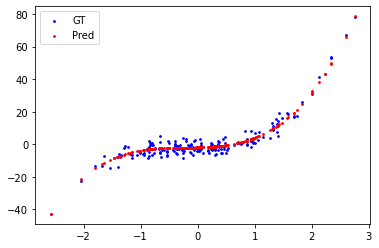

In [17]:
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.scatter(test_X, pred, s = 3, c = 'red', label = 'Pred')
plt.legend()
plt.show()

### 1.5.4 최소제곱 선형 회귀 모델 평가

In [18]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.949834


### 1.6 다항 피쳐 선택에 따른 모델 성능 비교

2제곱에서 24제곱까지의 다항 피쳐를 사용하였을 때 성능을 비교해보겠습니다.

In [20]:
degrees = np.arange(2, 25)
print(degrees)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [22]:
r2s = []
# 2제곱 피쳐부터 24제곱 피쳐까지 반복하며 총 23개 모델 생성
for degree in degrees:
    train_Xs = np.concatenate([train_X ** i for i in range(degree + 1)], axis=1)
    test_Xs = np.concatenate([test_X ** i for i in range(degree + 1)], axis=1)
    fitter = LinearRegression()
    fitter.fit(train_Xs, train_y)
    pred = fitter.predict(test_Xs)
    r2 = sklearn.metrics.r2_score(test_y, pred)
    print("Degree: %d -> R2 score: %f"%(degree, r2))
    r2s.append(r2)

Degree: 2 -> R2 score: 0.652474
Degree: 3 -> R2 score: 0.949834
Degree: 4 -> R2 score: 0.949863
Degree: 5 -> R2 score: 0.949525
Degree: 6 -> R2 score: 0.948715
Degree: 7 -> R2 score: 0.948016
Degree: 8 -> R2 score: 0.948088
Degree: 9 -> R2 score: 0.948196
Degree: 10 -> R2 score: 0.947491
Degree: 11 -> R2 score: 0.946404
Degree: 12 -> R2 score: 0.945894
Degree: 13 -> R2 score: 0.948829
Degree: 14 -> R2 score: 0.948599
Degree: 15 -> R2 score: 0.937195
Degree: 16 -> R2 score: 0.922179
Degree: 17 -> R2 score: 0.922574
Degree: 18 -> R2 score: 0.883105
Degree: 19 -> R2 score: 0.735307
Degree: 20 -> R2 score: 0.937408
Degree: 21 -> R2 score: 0.935197
Degree: 22 -> R2 score: -0.652393
Degree: 23 -> R2 score: -0.352344
Degree: 24 -> R2 score: -4.219458


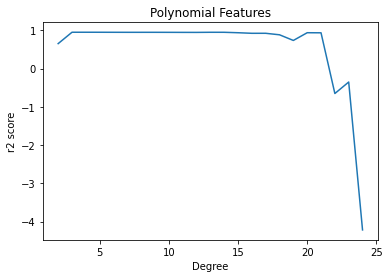

In [23]:
plt.plot(degrees, r2s)
plt.title('Polynomial Features')
plt.xlabel('Degree')
plt.ylabel('r2 score')
plt.show()

피쳐를 과도하게 많이 사용하면 오히려 모델의 성능이 떨어지는 것을 확인할 수 있습니다. 적절한 degree를 찾아 설정해주는 것이 중요하겠습니다.

## 2. MLP 모델의 구현
---
다음으로, 비선형 데이터를 잘 다룰 수 있는 다층 퍼셉트론 모델 (Multi-layer perceptron; MLP) 을 구현해보겠습니다.

### 2.1 라이브러리 불러오기

In [24]:
import tensorflow as tf

### 2.2 비선형 데이터 생성

In [25]:
np.random.seed(0)
X = np.random.normal(size = (1000, 1)) 
y = np.e ** X + np.random.normal(size = (1000, 1)) * 1

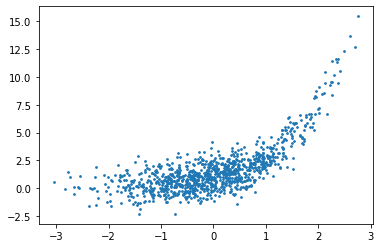

In [26]:
plt.scatter(X, y, s = 3)
plt.show()

### 2.3 데이터 분할

In [156]:
train_ratio = 0.8
train_X = X[:int(len(X) * train_ratio)].reshape(-1, 1)
train_y = y[:int(len(X) * train_ratio)].reshape(-1, 1)
test_X = X[int(len(X) * train_ratio):].reshape(-1, 1)
test_y = y[int(len(X) * trai_ratio):].reshape(-1, 1)

NameError: name 'trai_ratio' is not defined

### 2.4 MLP 모델 설정

In [ ]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

### 2.5 학습 방법 설정

In [157]:
MLP_model.compile(loss = 'mse',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['mse']
)

### 2.6 모델 학습

In [158]:
# verbose = 0 : 훈련과정이 나오지 않음
# verbose = 1 : 학습되는 과정이 출력됨 (default)
# verbose = 2 : loss, metrics 값만 출력됨
# verbose = 3 : epoch 값만 출력됨
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 1.5344 - mse: 1.5344 - 251ms/epoch - 5ms/step
Epoch 2/10
50/50 - 0s - loss: 1.2355 - mse: 1.2355 - 39ms/epoch - 780us/step
Epoch 3/10
50/50 - 0s - loss: 1.0742 - mse: 1.0742 - 35ms/epoch - 703us/step
Epoch 4/10
50/50 - 0s - loss: 1.0567 - mse: 1.0567 - 39ms/epoch - 777us/step
Epoch 5/10
50/50 - 0s - loss: 0.9947 - mse: 0.9947 - 39ms/epoch - 786us/step
Epoch 6/10
50/50 - 0s - loss: 0.9857 - mse: 0.9857 - 36ms/epoch - 712us/step
Epoch 7/10
50/50 - 0s - loss: 0.9927 - mse: 0.9927 - 40ms/epoch - 793us/step
Epoch 8/10
50/50 - 0s - loss: 1.0165 - mse: 1.0165 - 41ms/epoch - 826us/step
Epoch 9/10
50/50 - 0s - loss: 1.0068 - mse: 1.0068 - 38ms/epoch - 762us/step
Epoch 10/10
50/50 - 0s - loss: 1.0236 - mse: 1.0236 - 47ms/epoch - 940us/step


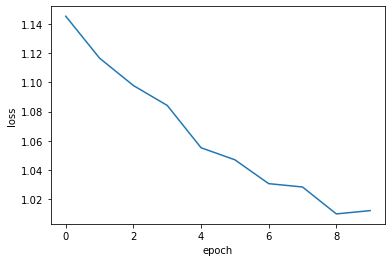

In [41]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 2.7 모델 예측

In [130]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 957us/step


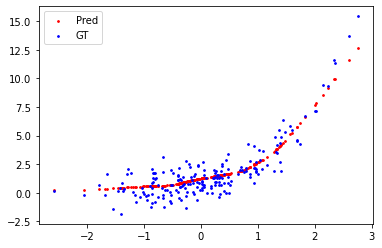

In [131]:
plt.scatter(test_X, pred, s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.legend()
plt.show()

### 2.8 모델 평가

In [132]:
from sklearn.metrics import mean_squared_error

def RMSE(test_y, pred):
    return np.sqrt(mean_squared_error(test_y, pred))



print('RMSE : ', RMSE(test_y, pred)) 

RMSE :  0.9863741345307564


In [133]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.833502


이론적으로 R2-score 는 선형 회귀의 설명력에 대한 지표이기 때문에 비선형 회귀에 적용할 수 없습니다. 그러나, 여기서는 통계학적으로 깊이 들어가지는 않을 것이기 때문에 편의를 위해 R2-score를 사용하겠습니다.

### 2.9 학습률 조정해보기

### 2.9.1 학습률이 너무 클 때

In [134]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [135]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.3),
)

In [136]:
history_toobig = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 4.3877 - 201ms/epoch - 4ms/step
Epoch 2/10
50/50 - 0s - loss: 4.1892 - 33ms/epoch - 654us/step
Epoch 3/10
50/50 - 0s - loss: 4.0803 - 33ms/epoch - 663us/step
Epoch 4/10
50/50 - 0s - loss: 4.0486 - 35ms/epoch - 705us/step
Epoch 5/10
50/50 - 0s - loss: 4.0565 - 32ms/epoch - 632us/step
Epoch 6/10
50/50 - 0s - loss: 4.0792 - 32ms/epoch - 646us/step
Epoch 7/10
50/50 - 0s - loss: 4.0057 - 34ms/epoch - 677us/step
Epoch 8/10
50/50 - 0s - loss: 4.0398 - 34ms/epoch - 671us/step
Epoch 9/10
50/50 - 0s - loss: 4.0569 - 34ms/epoch - 681us/step
Epoch 10/10
50/50 - 0s - loss: 4.0592 - 31ms/epoch - 627us/step


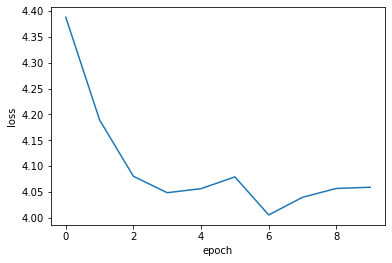

In [137]:
plt.plot(history_toobig.epoch, history_toobig.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [138]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 1ms/step


In [139]:
print('RMSE : ', RMSE(test_y, pred)) 

RMSE :  2.4189076618375966


In [140]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: -0.001300


### 2.9.2 학습률이 적당할 때

In [141]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [142]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
)

In [143]:
history_good = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 3.1401 - 176ms/epoch - 4ms/step
Epoch 2/10
50/50 - 0s - loss: 1.4206 - 30ms/epoch - 595us/step
Epoch 3/10
50/50 - 0s - loss: 1.3030 - 30ms/epoch - 592us/step
Epoch 4/10
50/50 - 0s - loss: 1.2477 - 32ms/epoch - 634us/step
Epoch 5/10
50/50 - 0s - loss: 1.2121 - 31ms/epoch - 621us/step
Epoch 6/10
50/50 - 0s - loss: 1.1682 - 32ms/epoch - 649us/step
Epoch 7/10
50/50 - 0s - loss: 1.1250 - 31ms/epoch - 615us/step
Epoch 8/10
50/50 - 0s - loss: 1.0975 - 30ms/epoch - 610us/step
Epoch 9/10
50/50 - 0s - loss: 1.0615 - 30ms/epoch - 607us/step
Epoch 10/10
50/50 - 0s - loss: 1.0357 - 32ms/epoch - 648us/step


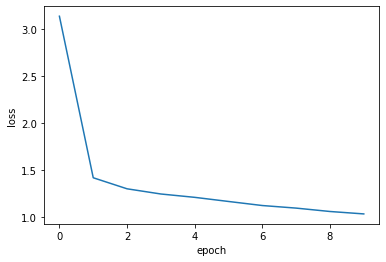

In [144]:
plt.plot(history_good.epoch, history_good.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [145]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 749us/step


In [146]:
print('RMSE : ', RMSE(test_y, pred)) 

RMSE :  1.0973047266846288


In [147]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.793946


### 2.9.3 학습률이 너무 낮을 때

In [148]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [149]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001),
)

In [150]:
history_toolow = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 5.8623 - 188ms/epoch - 4ms/step
Epoch 2/10
50/50 - 0s - loss: 5.7025 - 31ms/epoch - 612us/step
Epoch 3/10
50/50 - 0s - loss: 5.5528 - 29ms/epoch - 589us/step
Epoch 4/10
50/50 - 0s - loss: 5.4117 - 32ms/epoch - 644us/step
Epoch 5/10
50/50 - 0s - loss: 5.2764 - 30ms/epoch - 604us/step
Epoch 6/10
50/50 - 0s - loss: 5.1421 - 31ms/epoch - 617us/step
Epoch 7/10
50/50 - 0s - loss: 5.0067 - 34ms/epoch - 674us/step
Epoch 8/10
50/50 - 0s - loss: 4.8748 - 31ms/epoch - 620us/step
Epoch 9/10
50/50 - 0s - loss: 4.7463 - 34ms/epoch - 672us/step
Epoch 10/10
50/50 - 0s - loss: 4.6210 - 30ms/epoch - 605us/step


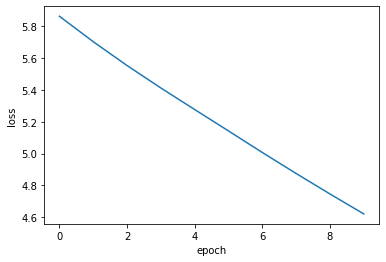

In [151]:
plt.plot(history_toolow.epoch, history_toolow.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [152]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 754us/step


In [153]:
print('RMSE : ', RMSE(test_y, pred)) 

RMSE :  2.543821708615221


In [154]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: -0.107386


### 2.9.4 학습률에 따른 loss 변화 그래프

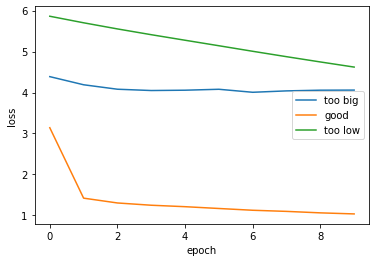

In [155]:
plt.plot(history_toobig.epoch, history_toobig.history['loss'], label = 'too big')
plt.plot(history_good.epoch, history_good.history['loss'], label = 'good')
plt.plot(history_toolow.epoch, history_toolow.history['loss'], label = 'too low')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### 2.10 최적화 방법 (Optimizer) 조정해보기

### 2.10.1 Stochastic Gradient Descent

In [116]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [117]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
)

In [118]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 2.3721 - 199ms/epoch - 4ms/step
Epoch 2/10
50/50 - 0s - loss: 1.3623 - 34ms/epoch - 684us/step
Epoch 3/10
50/50 - 0s - loss: 1.2742 - 31ms/epoch - 624us/step
Epoch 4/10
50/50 - 0s - loss: 1.2330 - 36ms/epoch - 711us/step
Epoch 5/10
50/50 - 0s - loss: 1.1848 - 31ms/epoch - 615us/step
Epoch 6/10
50/50 - 0s - loss: 1.1566 - 41ms/epoch - 810us/step
Epoch 7/10
50/50 - 0s - loss: 1.1285 - 43ms/epoch - 862us/step
Epoch 8/10
50/50 - 0s - loss: 1.0876 - 34ms/epoch - 676us/step
Epoch 9/10
50/50 - 0s - loss: 1.0659 - 35ms/epoch - 691us/step
Epoch 10/10
50/50 - 0s - loss: 1.0385 - 30ms/epoch - 603us/step


In [119]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 804us/step


In [120]:
print('RMSE : ', RMSE(test_y, pred)) 

RMSE :  1.087852744813962


In [121]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.797481


### 2.10.2 Adagrad

In [110]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [111]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01),
)

In [112]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 2.4443 - 201ms/epoch - 4ms/step
Epoch 2/10
50/50 - 0s - loss: 1.3365 - 33ms/epoch - 651us/step
Epoch 3/10
50/50 - 0s - loss: 1.3077 - 30ms/epoch - 602us/step
Epoch 4/10
50/50 - 0s - loss: 1.2822 - 38ms/epoch - 763us/step
Epoch 5/10
50/50 - 0s - loss: 1.2630 - 37ms/epoch - 741us/step
Epoch 6/10
50/50 - 0s - loss: 1.2390 - 43ms/epoch - 867us/step
Epoch 7/10
50/50 - 0s - loss: 1.2299 - 35ms/epoch - 698us/step
Epoch 8/10
50/50 - 0s - loss: 1.2185 - 34ms/epoch - 689us/step
Epoch 9/10
50/50 - 0s - loss: 1.2010 - 32ms/epoch - 643us/step
Epoch 10/10
50/50 - 0s - loss: 1.1853 - 30ms/epoch - 599us/step


In [113]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 870us/step


In [114]:
print('RMSE : ', RMSE(test_y, pred)) 

RMSE :  1.2344927163560608


In [115]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.739203


### 2.10.3 Adam

In [97]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape=train_X.shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [99]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

In [100]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 1.8867 - 236ms/epoch - 5ms/step
Epoch 2/10
50/50 - 0s - loss: 1.1172 - 38ms/epoch - 763us/step
Epoch 3/10
50/50 - 0s - loss: 1.0116 - 35ms/epoch - 704us/step
Epoch 4/10
50/50 - 0s - loss: 1.0191 - 40ms/epoch - 797us/step
Epoch 5/10
50/50 - 0s - loss: 1.0035 - 39ms/epoch - 771us/step
Epoch 6/10
50/50 - 0s - loss: 1.0742 - 34ms/epoch - 671us/step
Epoch 7/10
50/50 - 0s - loss: 0.9895 - 35ms/epoch - 702us/step
Epoch 8/10
50/50 - 0s - loss: 1.0166 - 35ms/epoch - 697us/step
Epoch 9/10
50/50 - 0s - loss: 1.0030 - 39ms/epoch - 778us/step
Epoch 10/10
50/50 - 0s - loss: 0.9713 - 36ms/epoch - 720us/step


In [101]:
pred = MLP_model.predict(test_X)

7/7 [==============================] - 0s 1ms/step


In [102]:
print('RMSE : ', RMSE(test_y, pred)) 

RMSE :  0.988265603217737


In [103]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.832863


실험 결과 SGD 가 가장 높은 성능을 보였으며, Adagrad가 가장 낮은 성능을 보였습니다. 그러나, 데이터에 따라 최적화 방법의 성능은 달라질 수 있으며, 설정 가능한 parameter를 어떻게 설정하는지 역시 중요합니다.

## 3. 회귀 모델 수행
---
다음으로, 금속분말 데이터를 이용하여 MLP 를 학습해보겠습니다.

### 3.1 라이브러리 불러오기

In [64]:
import numpy as np
import json

### 3.2 학습용, 검증용, 테스트용 데이터 읽어오기

In [65]:
stage1 = {
    'train_X': np.load('./Data/train_data_stage1_X.npy'),
    'train_y': np.load('./Data/train_data_stage1_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage1_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage1_y.npy'),
    'test_X': np.load('./Data/test_data_stage1_X.npy'),
    'test_y': np.load('./Data/test_data_stage1_y.npy'),
}

stage2 = {
    'train_X': np.load('./Data/train_data_stage2_X.npy'),
    'train_y': np.load('./Data/train_data_stage2_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage2_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage2_y.npy'),
    'test_X': np.load('./Data/test_data_stage2_X.npy'),
    'test_y': np.load('./Data/test_data_stage2_y.npy'),
}

columns = json.load(open('./Data/valid_columns.json', 'r'))
columns['stage2_output'] = [i.replace('Stage1','Stage2') for i in columns['stage2_output']]

### 3.3 데이터 표준화하기

### 3.3.1 Stage1 데이터 표준화하기

In [66]:
stage1_X_mean = stage1['train_X'].mean(axis = 0)
stage1_y_mean = stage1['train_y'].mean(axis = 0)
print('입력값 평균:', stage1_X_mean)
print('출력값 평균:', stage1_y_mean)

입력값 평균: [  11.85294587  205.74478705  951.00255435 1242.437388     72.01273285
   72.01162996   70.34571071   11.07603585  408.95062376   81.47648118
   75.96962985   12.79330524  566.38390195  202.65058918   68.99620414
   69.10054828   73.3958155    13.89662164  226.12474952   76.81680896
   59.99898793    9.08815439  205.71384206  425.06943434  202.26546402
   78.00841235   78.00453278  345.11532917   13.26721071  246.73680272
   74.14375402   65.00868711  108.96768422   84.98831262   80.00354672
   15.32405834   23.84402174]
출력값 평균: [12.89768652 13.69662267  8.00480187 11.36113325 21.31940678 32.87843839
  0.12721732  1.34725458  1.09990652 19.8051213   7.68305334  1.4919701
  1.20588607  2.89104562 10.02515553]


In [67]:
stage1_X_std = stage1['train_X'].std(axis = 0)
stage1_y_std = stage1['train_y'].std(axis = 0)
print('입력값 표준편차:', stage1_X_std)
print('출력값 표준편차:', stage1_y_std)

입력값 표준편차: [5.10993143e-01 1.16806618e+01 1.27620111e+02 9.77321235e+01
 6.23396785e-02 4.06238919e-01 5.49867530e+00 6.36170724e-01
 2.05368437e+01 9.21642493e-01 2.06429784e+00 1.07360805e-01
 1.83380514e+01 1.48381842e+01 5.44970706e-02 1.06721153e-01
 3.94100055e-01 2.91335938e-02 3.06908107e+00 8.30358591e-01
 1.61971729e-01 3.95092636e-01 1.63223059e+01 9.53699574e+00
 1.58921785e+01 7.73526529e-02 1.14547773e-01 9.05396328e+00
 4.34061012e-01 6.10492128e+00 2.05042127e+00 6.27961350e-02
 5.59761035e+00 1.85637963e+01 1.18126539e-01 1.18770739e+00
 3.72221796e-01]
출력값 표준편차: [0.9270819  0.85503751 6.90580271 1.03664992 2.14313701 3.882343
 0.57606676 1.13060617 1.41265541 4.68687927 1.07824517 2.54294205
 0.66114934 0.92884134 7.38778856]


In [68]:
# 학습 데이터 표준화
stage1['train_X'] = (stage1['train_X'] - stage1_X_mean) / stage1_X_std
stage1['train_y'] = (stage1['train_y'] - stage1_y_mean) / stage1_y_std
# 검증용 데이터 표준화
stage1['valid_X'] = (stage1['valid_X'] - stage1_X_mean) / stage1_X_std
stage1['valid_y'] = (stage1['valid_y'] - stage1_y_mean) / stage1_y_std
# 테스트 데이터 표준화
stage1['test_X'] = (stage1['test_X'] - stage1_X_mean) / stage1_X_std
stage1['test_y'] = (stage1['test_y'] - stage1_y_mean) / stage1_y_std

### 3.3.2 Stage2 데이터 표준화하기

In [69]:
stage2_X_mean = stage2['train_X'].mean(axis = 0)
stage2_y_mean = stage2['train_y'].mean(axis = 0)
print('입력값 평균:', stage2_X_mean)
print('출력값 평균:', stage2_y_mean)

입력값 평균: [1.28976865e+01 1.36966227e+01 8.00480187e+00 1.13611333e+01
 2.13194068e+01 3.28784384e+01 1.27217323e-01 1.34725458e+00
 1.09990652e+00 1.98051213e+01 7.68305334e+00 1.49197010e+00
 1.20588607e+00 2.89104562e+00 1.00251555e+01 3.60122933e+02
 3.60136275e+02 1.72294333e+01 3.22627969e+02 3.09786854e+02
 1.87200947e+02 3.09998282e+02 2.89997582e+02 2.69681649e+02
 2.42661246e+02 2.44994629e+02 6.34195390e+01 1.54046742e+02
 1.53240583e+01 2.38440217e+01]
출력값 평균: [11.69212911  6.25614828 10.2499656  19.33555126  2.87697932  2.7475277
  0.53310706  2.91750962 18.38898671 11.61424043  7.53420311  3.54181714
  7.51699723]


In [70]:
stage2_X_std = stage2['train_X'].std(axis = 0)
stage2_y_std = stage2['train_y'].std(axis = 0)
print('입력값 표준편차:', stage2_X_std)
print('출력값 표준편차:', stage2_y_std)

입력값 표준편차: [ 0.9270819   0.85503751  6.90580271  1.03664992  2.14313701  3.882343
  0.57606676  1.13060617  1.41265541  4.68687927  1.07824517  2.54294205
  0.66114934  0.92884134  7.38778856  1.9209727   2.64895901  0.94209921
  3.61537985  2.74078134 23.41676809  0.03961971  0.05202987  1.01853204
  1.59098238  0.10771334  0.39587306  9.90869048  1.18770739  0.3722218 ]
출력값 표준편차: [3.62230517 1.60057596 2.30753588 4.62537631 9.09270122 0.37574164
 0.20467783 0.49744294 4.97294003 7.62127826 1.64901449 0.45450424
 2.0723342 ]


In [71]:
# 학습 데이터 표준화
stage2['train_X'] = (stage2['train_X'] - stage2_X_mean) / stage2_X_std
stage2['train_y'] = (stage2['train_y'] - stage2_y_mean) / stage2_y_std

# 검증용 데이터 표준화
stage2['valid_X'] = (stage2['valid_X'] - stage2_X_mean) / stage2_X_std
stage2['valid_y'] = (stage2['valid_y'] - stage2_y_mean) / stage2_y_std

# 테스트 데이터 표준화
stage2['test_X'] = (stage2['test_X'] - stage2_X_mean) / stage2_X_std
stage2['test_y'] = (stage2['test_y'] - stage2_y_mean) / stage2_y_std

### 3.4 MLP 회귀 모델 수행 (Stage1)

### 3.4.1 모델 정의

In [72]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape = stage1['train_X'].shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(stage1['train_y'].shape[1])
])

### 3.4.2 모델 학습 방법 설정

In [73]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

### 3.4.3 모델 학습

In [74]:
history = MLP_model.fit(stage1['train_X'], stage1['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.9108
Epoch 2/50
564/564 - 0s - loss: 0.7799
Epoch 3/50
564/564 - 0s - loss: 0.7435
Epoch 4/50
564/564 - 0s - loss: 0.7207
Epoch 5/50
564/564 - 0s - loss: 0.7021
Epoch 6/50
564/564 - 0s - loss: 0.6868
Epoch 7/50
564/564 - 0s - loss: 0.6732
Epoch 8/50
564/564 - 0s - loss: 0.6619
Epoch 9/50
564/564 - 0s - loss: 0.6515
Epoch 10/50
564/564 - 0s - loss: 0.6425
Epoch 11/50
564/564 - 0s - loss: 0.6350
Epoch 12/50
564/564 - 0s - loss: 0.6279
Epoch 13/50
564/564 - 0s - loss: 0.6210
Epoch 14/50
564/564 - 0s - loss: 0.6157
Epoch 15/50
564/564 - 0s - loss: 0.6099
Epoch 16/50
564/564 - 0s - loss: 0.6045
Epoch 17/50
564/564 - 0s - loss: 0.6002
Epoch 18/50
564/564 - 0s - loss: 0.5945
Epoch 19/50
564/564 - 0s - loss: 0.5900
Epoch 20/50
564/564 - 0s - loss: 0.5847
Epoch 21/50
564/564 - 0s - loss: 0.5802
Epoch 22/50
564/564 - 0s - loss: 0.5747
Epoch 23/50
564/564 - 0s - loss: 0.5703
Epoch 24/50
564/564 - 0s - loss: 0.5657
Epoch 25/50
564/564 - 0s - loss: 0.5612
Epoch 26/

### 3.4.4 모델 예측

In [75]:
pred = MLP_model.predict(stage1['test_X'])

### 3.4.5 모델 평가

In [76]:
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.535187


### 3.4 MLP 회귀 모델 수행 (Stage2)

### 3.4.1 모델 정의

In [77]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    Input(shape = stage2['train_X'].shape[1]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(stage2['train_y'].shape[1])
])

### 3.4.2 모델 학습 방법 설정

In [78]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
)

### 3.4.3 모델 학습

In [79]:
history = MLP_model.fit(stage2['train_X'], stage2['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 1s - loss: 0.6670
Epoch 2/50
564/564 - 0s - loss: 0.5137
Epoch 3/50
564/564 - 0s - loss: 0.4838
Epoch 4/50
564/564 - 0s - loss: 0.4684
Epoch 5/50
564/564 - 0s - loss: 0.4578
Epoch 6/50
564/564 - 0s - loss: 0.4498
Epoch 7/50
564/564 - 0s - loss: 0.4427
Epoch 8/50
564/564 - 0s - loss: 0.4366
Epoch 9/50
564/564 - 0s - loss: 0.4314
Epoch 10/50
564/564 - 0s - loss: 0.4262
Epoch 11/50
564/564 - 0s - loss: 0.4212
Epoch 12/50
564/564 - 0s - loss: 0.4168
Epoch 13/50
564/564 - 0s - loss: 0.4120
Epoch 14/50
564/564 - 0s - loss: 0.4083
Epoch 15/50
564/564 - 0s - loss: 0.4038
Epoch 16/50
564/564 - 0s - loss: 0.3999
Epoch 17/50
564/564 - 0s - loss: 0.3960
Epoch 18/50
564/564 - 0s - loss: 0.3923
Epoch 19/50
564/564 - 0s - loss: 0.3896
Epoch 20/50
564/564 - 0s - loss: 0.3861
Epoch 21/50
564/564 - 0s - loss: 0.3833
Epoch 22/50
564/564 - 0s - loss: 0.3801
Epoch 23/50
564/564 - 0s - loss: 0.3792
Epoch 24/50
564/564 - 0s - loss: 0.3767
Epoch 25/50
564/564 - 0s - loss: 0.3727
Epoch 26/

### 3.4.4 모델 예측

In [80]:
pred = MLP_model.predict(stage2['test_X'])

### 3.4.5 모델 평가

In [81]:
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.646388


<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>